# Check for drift in piControl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datapath = '../Processed_data/Nino3_4_DJF/'
models = ['BCC-CSM2-MR', 'CanESM5', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'E3SM-1-0', 
          'EC-Earth3', 'EC-Earth3-Veg', 'MIROC-ES2L', 'MIROC6', 'HadGEM3-GC31-LL',
           'HadGEM3-GC31-MM', 'UKESM1-0-LL', 'MRI-ESM2-0', 'GISS-E2-1-G', 'CESM2',
           'CESM2-WACCM', 'SAM0-UNICON', 'MCM-UA-1-0'] # , 'GFDL-ESM4'

0.0023680238256081725


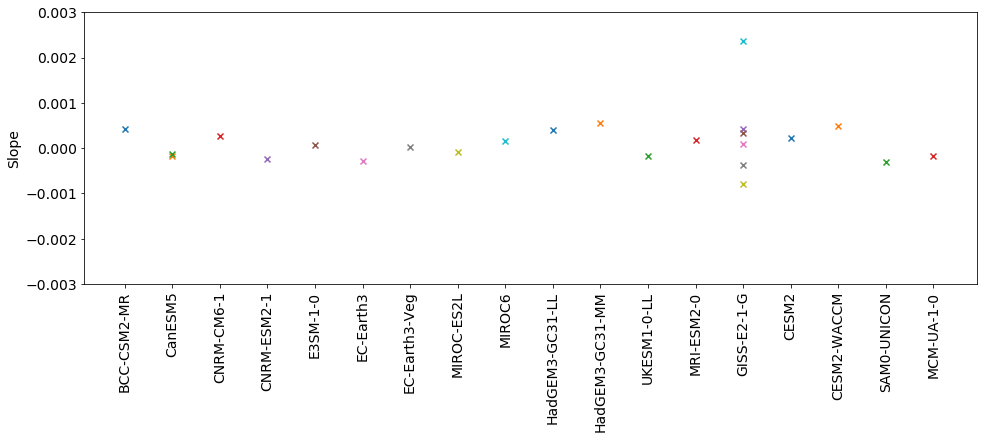

In [2]:
exp = 'piControl'
slopes = {}; slopelist = []

fig, ax = plt.subplots(figsize = [16,5])

x = np.arange(len(models)) + 1
    
for (ind, model) in enumerate(models):
    file = model + '_DJF_nino3_4index.txt'
    data_table = pd.read_csv(datapath + file,index_col=0, header=[0,1], keep_default_na = False)
    slopes[model] = {}
    for member in data_table[exp]:
        data_list = data_table[exp][member].values
        data = np.array([np.float(i) for i in data_list if i])
        
        p1 = np.polyfit(np.arange(len(data)), data, deg = 1)
        slopes[model][member] = p1[0]
        slopelist = np.concatenate((slopelist, [p1[0]]))
        ax.scatter(x[ind], slopes[model][member], marker = 'x')
        
ax.tick_params(axis='both',labelsize=14)    
ax.set_ylabel('Slope', fontsize = 14)
plt.xticks(x, models, rotation=90);
ax.set_ylim(-0.003, 0.003)

print(max(abs(slopelist)))


In [3]:
np.sort(slopelist*500) # check temperature change over a 500 yr period

array([-0.3968645 , -0.18275909, -0.15213485, -0.14561236, -0.11438193,
       -0.08859383, -0.08807465, -0.08251208, -0.06641142, -0.04458806,
        0.01212999,  0.03083253,  0.04699383,  0.07903023,  0.08523032,
        0.11141044,  0.12992183,  0.17097784,  0.19931491,  0.21116525,
        0.21416154,  0.24988474,  0.28145858,  1.18401191])